# This notebook is divided in two parts:
  - ## [Predict by Classifiers](#Classifiers)
  - ## [Predict by Neural Network](#Neural_Network)

# Analisys

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Other Libraries
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("data/estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv")
df.head(5)

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [3]:
df.describe()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1.702045,86.622985,0.817354,0.045062,0.026366,0.639326,0.709818,0.763670,0.379834,0.504361,0.337873,0.843202,0.855417,0.499760,3.110259
std,0.093419,26.256245,0.386469,0.207491,0.160260,0.769120,0.267493,0.645761,0.155956,0.306578,0.283687,0.537726,0.518064,0.353723,1.993832
min,1.450000,39.000000,0.000000,0.000000,0.000000,0.361418,0.000000,0.002375,0.000000,0.000000,0.000000,0.000146,0.516552,0.000000,0.000000
25%,1.630000,65.130595,1.000000,0.000000,0.000000,0.361418,0.500000,0.404704,0.333333,0.291005,0.042901,0.466622,0.516552,0.250000,1.000000
50%,1.701383,83.000000,1.000000,0.000000,0.000000,0.361418,0.695087,0.404704,0.333333,0.500000,0.333333,0.813973,0.516552,0.500000,3.000000
75%,1.768770,108.009452,1.000000,0.000000,0.000000,0.361418,1.000000,1.031717,0.333333,0.740243,0.557356,1.092724,1.439033,0.750000,5.000000
max,1.980000,165.057269,1.000000,1.000000,1.000000,2.766876,1.000000,2.164116,1.000000,1.000000,1.000000,2.194694,4.427721,1.000000,6.000000


In [4]:
df["NObeyesdad"].unique() # We can see that there are 7 possible levels of obesity

array([1, 2, 3, 4, 0, 5, 6], dtype=int64)

In [5]:
# No Null Values!!!
df.isna().sum() 

Height                            0
Weight                            0
family_history_with_overweight    0
SCC                               0
MTRANS_Walking                    0
FAVC_z                            0
FCVC_minmax                       0
NCP_z                             0
CAEC_minmax                       0
CH2O_minmax                       0
FAF_minmax                        0
TUE_z                             0
CALC_z                            0
Age_bin_minmax                    0
NObeyesdad                        0
dtype: int64

In [6]:
df.columns

Index(['Height', 'Weight', 'family_history_with_overweight', 'SCC',
       'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z', 'CAEC_minmax',
       'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax',
       'NObeyesdad'],
      dtype='object')

**Distributions**: By seeing the distributions we can have an idea of what we are going to need, since there are 7 possible outcomes to predict we'll use a Classifier

<Axes: xlabel='NObeyesdad', ylabel='count'>

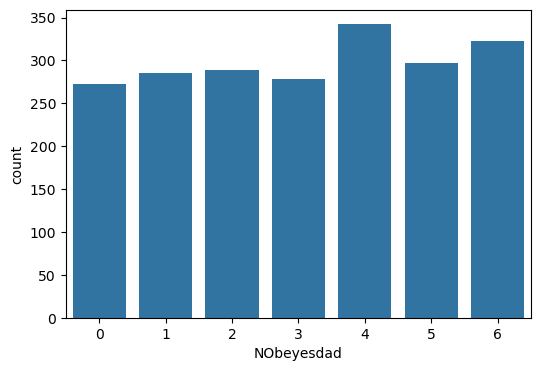

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='NObeyesdad', data=df)

<Axes: >

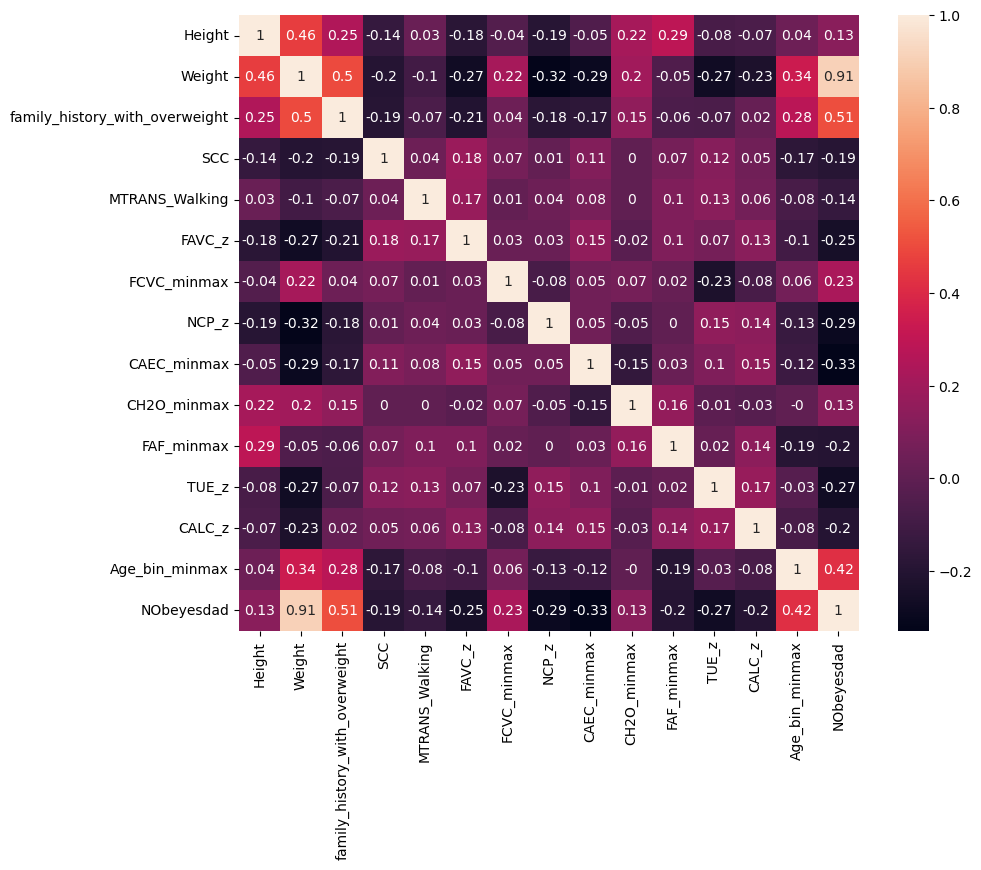

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2), annot=True)

# Classifiers

Since I am going to test several Classifiers models, I'll record them in a list with several parameters that will qualify or be important in deciding witch one is best.

In [9]:
X = df.drop("NObeyesdad", axis=1)
Y = df["NObeyesdad"]

lscores = []
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [10]:
def result(model, model_reg):
    predicciones = model_reg.predict(X_test)
    y_train_pred = cross_val_predict(model_reg, X_train, y_train, cv=3)
    lscores.append({
        "name" : model,
        "f1" : round(f1_score(y_train, y_train_pred, average="micro"), 4),
        "r2" : round(r2_score(y_test, predicciones), 4),
        "accuracy" : round(accuracy_score(y_train, y_train_pred), 4),
        "precission" : round(precision_score(y_train, y_train_pred, average="micro"), 4),
        "recall" : round(recall_score(y_train, y_train_pred, average="micro"), 4),
        "error_mse" : mean_squared_error(y_test, predicciones),
        "model_score" : np.mean(cross_val_score(model_reg, X_train, y_train, cv=3, scoring="accuracy")),
        "error_mae" : mean_absolute_error(y_test, predicciones)
    })

def roc_graph(models):
    plt.figure(figsize=(10,8))
    for i, (name, model) in enumerate(models.items()):
        y_scores = cross_val_predict(model, X_train, y_train, cv=3, method="predict_proba")
        lscores[i]["roc_auc_score"] = round(roc_auc_score(y_train, y_scores, multi_class="ovr"), 4)
        y_scores = y_scores[:,1]
        fpr, tpr, _ = roc_curve(y_train, y_scores, pos_label=1, drop_intermediate=True)
        plt.plot(fpr, tpr, label=name)
    
    plt.title("ROC curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

In [11]:
models = {
    "SGDClassifier": SGDClassifier("log_loss"),
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"), 
    "Naive Bayes": GaussianNB(),       
    "MLP Neural Network": MLPClassifier(max_iter=10000) 
}

In [12]:
for name, model in models.items():
    model.fit(X_train, y_train)
    result(name, model)

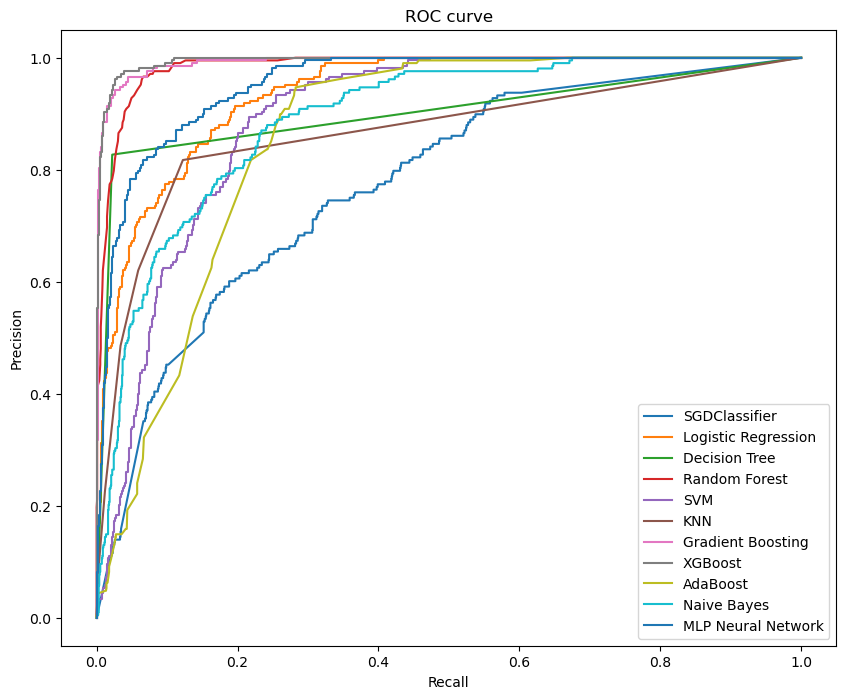

In [13]:
roc_graph(models)

In [14]:
results = pd.DataFrame(lscores)
results

,name,f1,r2,accuracy,precission,recall,error_mse,model_score,error_mae,roc_auc_score
0,SGDClassifier,0.3478,0.6327,0.3478,0.3478,0.3478,1.398467,0.347812,0.754789,0.7040
1,Logistic Regression,0.7602,0.9119,0.7602,0.7602,0.7602,0.335249,0.760236,0.266284,0.9594
2,Decision Tree,0.9118,0.9854,0.9118,0.9118,0.9118,0.055556,0.911106,0.047893,0.9469
3,Random Forest,0.9233,0.9869,0.9233,0.9233,0.9233,0.049808,0.925825,0.042146,0.9936
4,SVM,0.5614,0.8329,0.5614,0.5614,0.5614,0.636015,0.561379,0.517241,0.9015
5,KNN,0.7826,0.9140,0.7826,0.7826,0.7826,0.327586,0.782611,0.235632,0.9463
6,Gradient Boosting,0.9482,0.9899,0.9482,0.9482,0.9482,0.038314,0.947571,0.038314,0.9955
7,XGBoost,0.9540,0.9950,0.9540,0.9540,0.9540,0.019157,0.953965,0.019157,0.9966
8,AdaBoost,0.4214,0.7630,0.4214,0.4214,0.4214,0.902299,0.421371,0.668582,0.8535
9,Naive Bayes,0.5953,0.5914,0.5953,0.5953,0.5953,1.555556,0.595251,0.712644,0.8749


In [15]:
for name, model in models.items():
    predicciones = model.predict(X_test)

    errores=0
    for i, prediccion in enumerate(predicciones):
        if prediccion != list(y_test)[i]:
            errores+=1
    print(f"{name} Errors: {errores} in {len(X_test)} with: {round(errores/len(X_test)*100, 2)}% of error")

SGDClassifier Errors: 268 in 522 with: 51.34% of error
Logistic Regression Errors: 121 in 522 with: 23.18% of error
Decision Tree Errors: 23 in 522 with: 4.41% of error
Random Forest Errors: 20 in 522 with: 3.83% of error
SVM Errors: 239 in 522 with: 45.79% of error
KNN Errors: 100 in 522 with: 19.16% of error
Gradient Boosting Errors: 20 in 522 with: 3.83% of error
XGBoost Errors: 10 in 522 with: 1.92% of error
AdaBoost Errors: 288 in 522 with: 55.17% of error
Naive Bayes Errors: 214 in 522 with: 41.0% of error
MLP Neural Network Errors: 119 in 522 with: 22.8% of error


We can see that XGBoost is a little bit better than Gradient Boosting, so I will use XGBoost with optune to see witch would be the best params for this model

In [25]:
import optuna

def objective(trial):
   param = {
       'tree_method':'hist',
       #'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"]),
       #'device':'gpu',
       'eta': trial.suggest_float('eta', 1.25, 2),
       'max_depth': trial.suggest_int('max_depth', 6, 9),
       'learning_rate': trial.suggest_float('learning_rate', 0.020, 0.5),
       'n_estimators': trial.suggest_int('n_estimators', 300, 450),
       'min_child_weight': trial.suggest_int('min_child_weight', 7, 9),
       'gamma': trial.suggest_float('gamma', 0.5, 0.8),
       'subsample': trial.suggest_float('subsample', 0.7, 1.0),
       'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.55),
       'reg_alpha': trial.suggest_float('reg_alpha', 0.2, 0.6),
       'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 0.6),
   }

   model = XGBClassifier(**param)
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

study.best_params

[I 2024-09-17 00:28:53,560] A new study created in memory with name: no-name-fe39536c-d667-4557-b11e-b38b041c2a22
[I 2024-09-17 00:28:54,530] Trial 0 finished with value: 0.0842911877394636 and parameters: {'eta': 1.501307113330442, 'max_depth': 9, 'learning_rate': 0.07648714345485598, 'n_estimators': 375, 'min_child_weight': 7, 'gamma': 0.7156669561658977, 'subsample': 0.7599574545969642, 'colsample_bytree': 0.4584931461033917, 'reg_alpha': 0.4671756563512959, 'reg_lambda': 0.1127010446159602}. Best is trial 0 with value: 0.0842911877394636.
[I 2024-09-17 00:28:55,402] Trial 1 finished with value: 0.07854406130268199 and parameters: {'eta': 1.3296351351679114, 'max_depth': 6, 'learning_rate': 0.11489123892939551, 'n_estimators': 407, 'min_child_weight': 8, 'gamma': 0.542121736900279, 'subsample': 0.7161749529126872, 'colsample_bytree': 0.46253266682482813, 'reg_alpha': 0.3686038167566107, 'reg_lambda': 0.4381439248684656}. Best is trial 1 with value: 0.07854406130268199.
[I 2024-09-17

{'eta': 1.7306776526414847,
 'max_depth': 8,
 'learning_rate': 0.21536012488987766,
 'n_estimators': 379,
 'min_child_weight': 7,
 'gamma': 0.5341996031117497,
 'subsample': 0.8742861961265906,
 'colsample_bytree': 0.4050015172498878,
 'reg_alpha': 0.22300465943809583,
 'reg_lambda': 0.32007012668147494}

In [26]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.038314176245210725
Best hyperparameters: {'eta': 1.7306776526414847, 'max_depth': 8, 'learning_rate': 0.21536012488987766, 'n_estimators': 379, 'min_child_weight': 7, 'gamma': 0.5341996031117497, 'subsample': 0.8742861961265906, 'colsample_bytree': 0.4050015172498878, 'reg_alpha': 0.22300465943809583, 'reg_lambda': 0.32007012668147494}


In [27]:
optuna.visualization.plot_optimization_history(study)

# Neural_Network

In [28]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

from sklearn.preprocessing import StandardScaler
# StandarScaler for removing data that is too different see "Weight" in this dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)
print(X_train.shape)

(1173, 14)


In [29]:
import tensorflow as tf
import keras

model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(7, activation="softmax") # Since there will be 7 possible options
])
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"]);

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,479 (83.90 KB)

 Trainable params: 21,479 (83.90 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10000,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1521 - loss: 1.9609 - val_accuracy: 0.2558 - val_loss: 1.9241
Epoch 2/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2778 - loss: 1.9199 - val_accuracy: 0.3095 - val_loss: 1.8912
Epoch 3/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3388 - loss: 1.8768 - val_accuracy: 0.3376 - val_loss: 1.8507
Epoch 4/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3877 - loss: 1.8296 - val_accuracy: 0.3887 - val_loss: 1.7963
Epoch 5/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3996 - loss: 1.7786 - val_accuracy: 0.4271 - val_loss: 1.7138
Epoch 6/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3853 - loss: 1.6995 - val_accuracy: 0.4297 - val_loss: 1.6152
Epoch 7/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4167 - loss: 1.5967 - val_accuracy: 0.4425 - val_loss: 1.5157
Epoch 8/10000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4765 - loss: 1.4807 - val_accu

<Axes: >

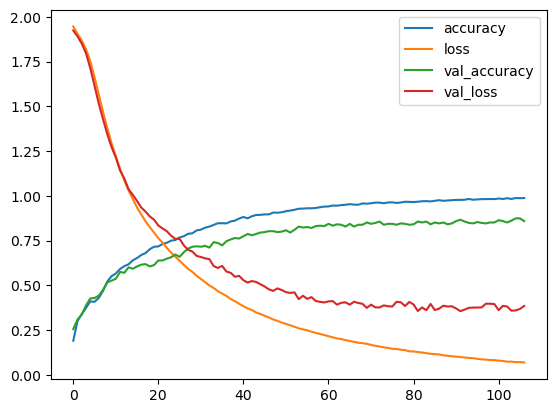

In [31]:
df_dl = pd.DataFrame(history.history)
df_dl.plot()

In [32]:
model.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9014 - loss: 0.3206 


[0.36808744072914124, 0.8888888955116272]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


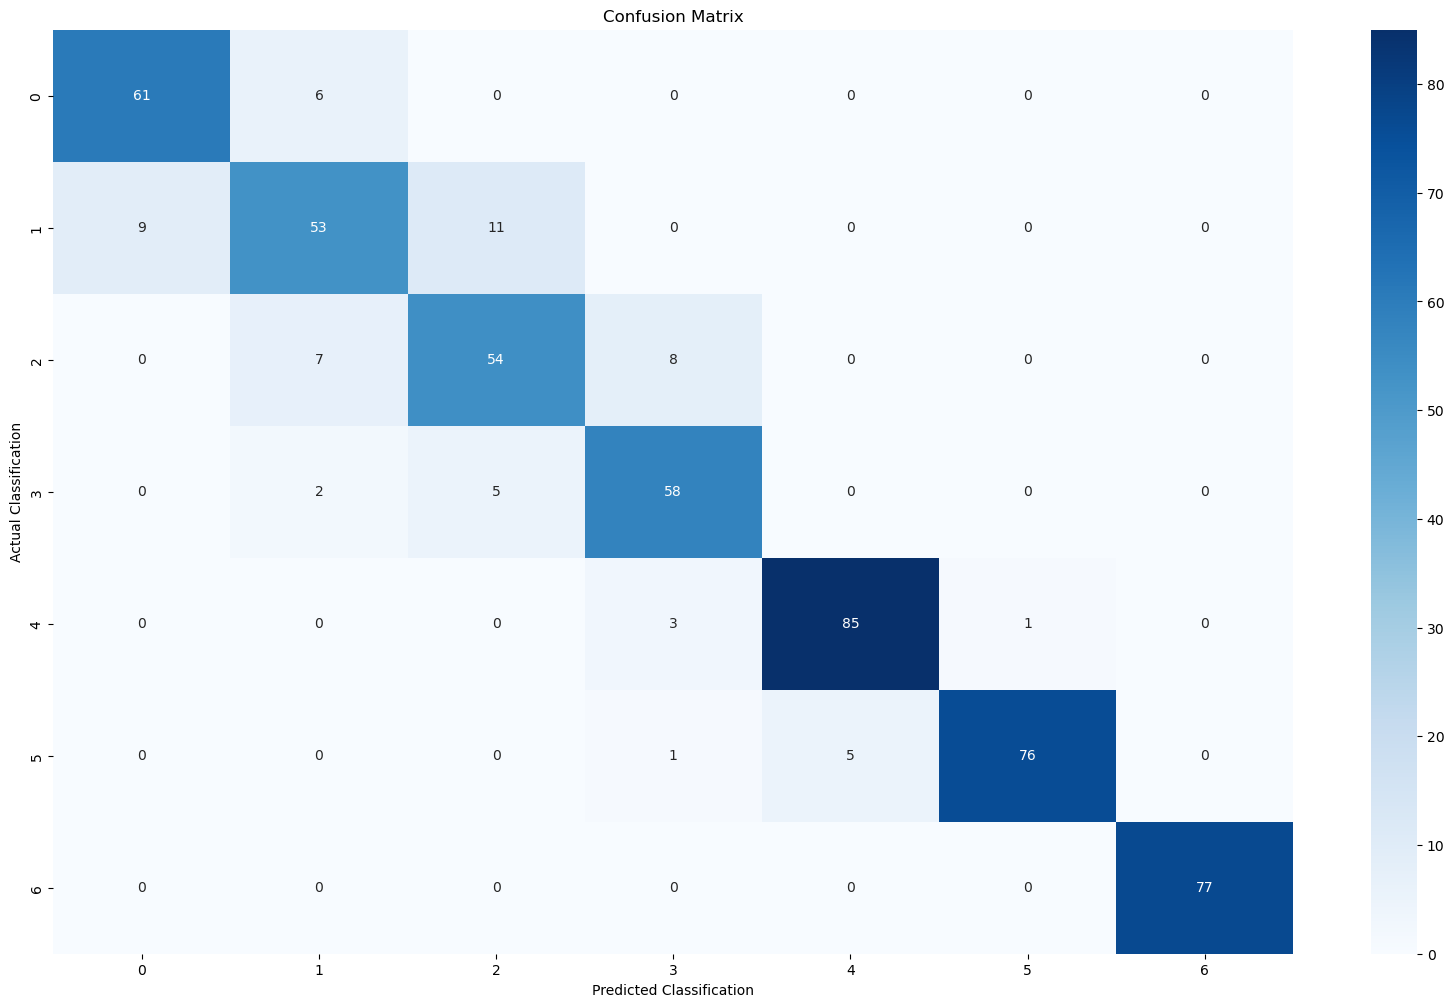

In [33]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
cm = confusion_matrix(y_test, y_test_pred_labels)
plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual Classification')
plt.xlabel('Predicted Classification')
plt.title('Confusion Matrix')
plt.show()